In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
car_df = pd.read_excel("./Data/train.xlsx")

In [3]:
car_df.rename(columns={"milage": "mileage"}, inplace=True)

In [5]:
car_df.head(5)

,id,brand,model,model_year,mileage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


Perfoming Exploratory Data Analysis

In [5]:
car_df.shape

(188533, 13)

In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   mileage       188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [7]:
car_df.describe()

,id,model_year,mileage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [12]:
numerical_col = {"id", "model_year", "mileage", "price"}
categorical_col = set(car_df.columns).difference(numerical_col)

In [14]:
car_df[list(categorical_col)].nunique()

int_col          156
fuel_type          7
accident           2
brand             57
engine          1117
model           1897
clean_title        1
ext_col          319
transmission      52
dtype: int64

Plotting Graphs

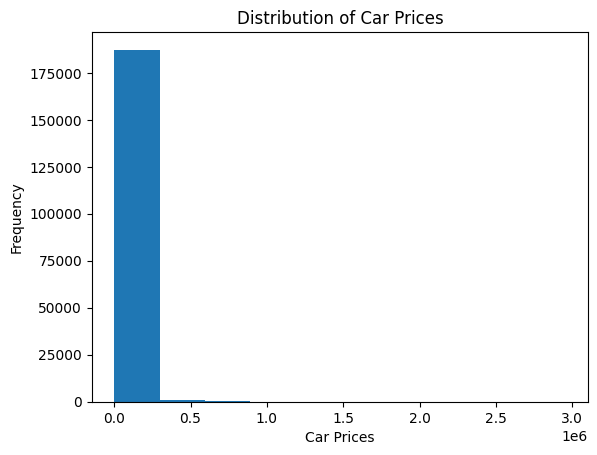

In [11]:
car_df["price"].plot(kind="hist", x="price", 
            title="Distribution of Car Prices", xlabel="Car Prices", ylabel="Frequency")
plt.show()

    model_year         price
0         1974  74124.083333
1         1992  26957.000000
2         1993  38091.871429
3         1994  50181.760870
4         1995  38205.872549
5         1996  17370.894180
6         1997  14586.419872
7         1998  13442.169096
8         1999  10702.705776
9         2000  13796.912186
10        2001  19227.459583
11        2002  21286.650546
12        2003  17021.920252
13        2004  19401.310506
14        2005  26376.852029
15        2006  18351.585288
16        2007  19449.327112
17        2008  20384.406711
18        2009  21522.417894
19        2010  19964.660449
20        2011  18084.812450
21        2012  19806.953897
22        2013  23437.342702
23        2014  24758.274866
24        2015  30974.878567
25        2016  33531.819655
26        2017  37943.234329
27        2018  47707.568722
28        2019  49375.295606
29        2020  61556.784074
30        2021  65893.857951
31        2022  72732.327005
32        2023  95707.912305
33        2024

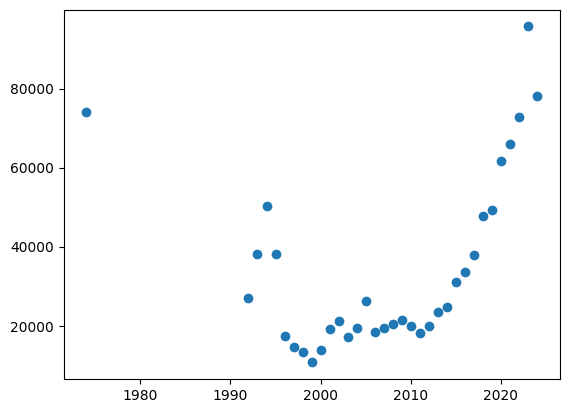

In [7]:
def plot_price_by_year():
    #finding average price per model year of used cars
    car_md_price = pd.DataFrame(car_df[["price", "model_year"]].groupby(by="model_year").mean())
    #reset index means model year is not the index (makes plotting it easier)
    car_md_price.reset_index(inplace=True)
    fig, ax = plt.subplots()
    ax.plot("model_year", "price", "o", data=car_md_price)
    plt.show()

plot_price_by_year()

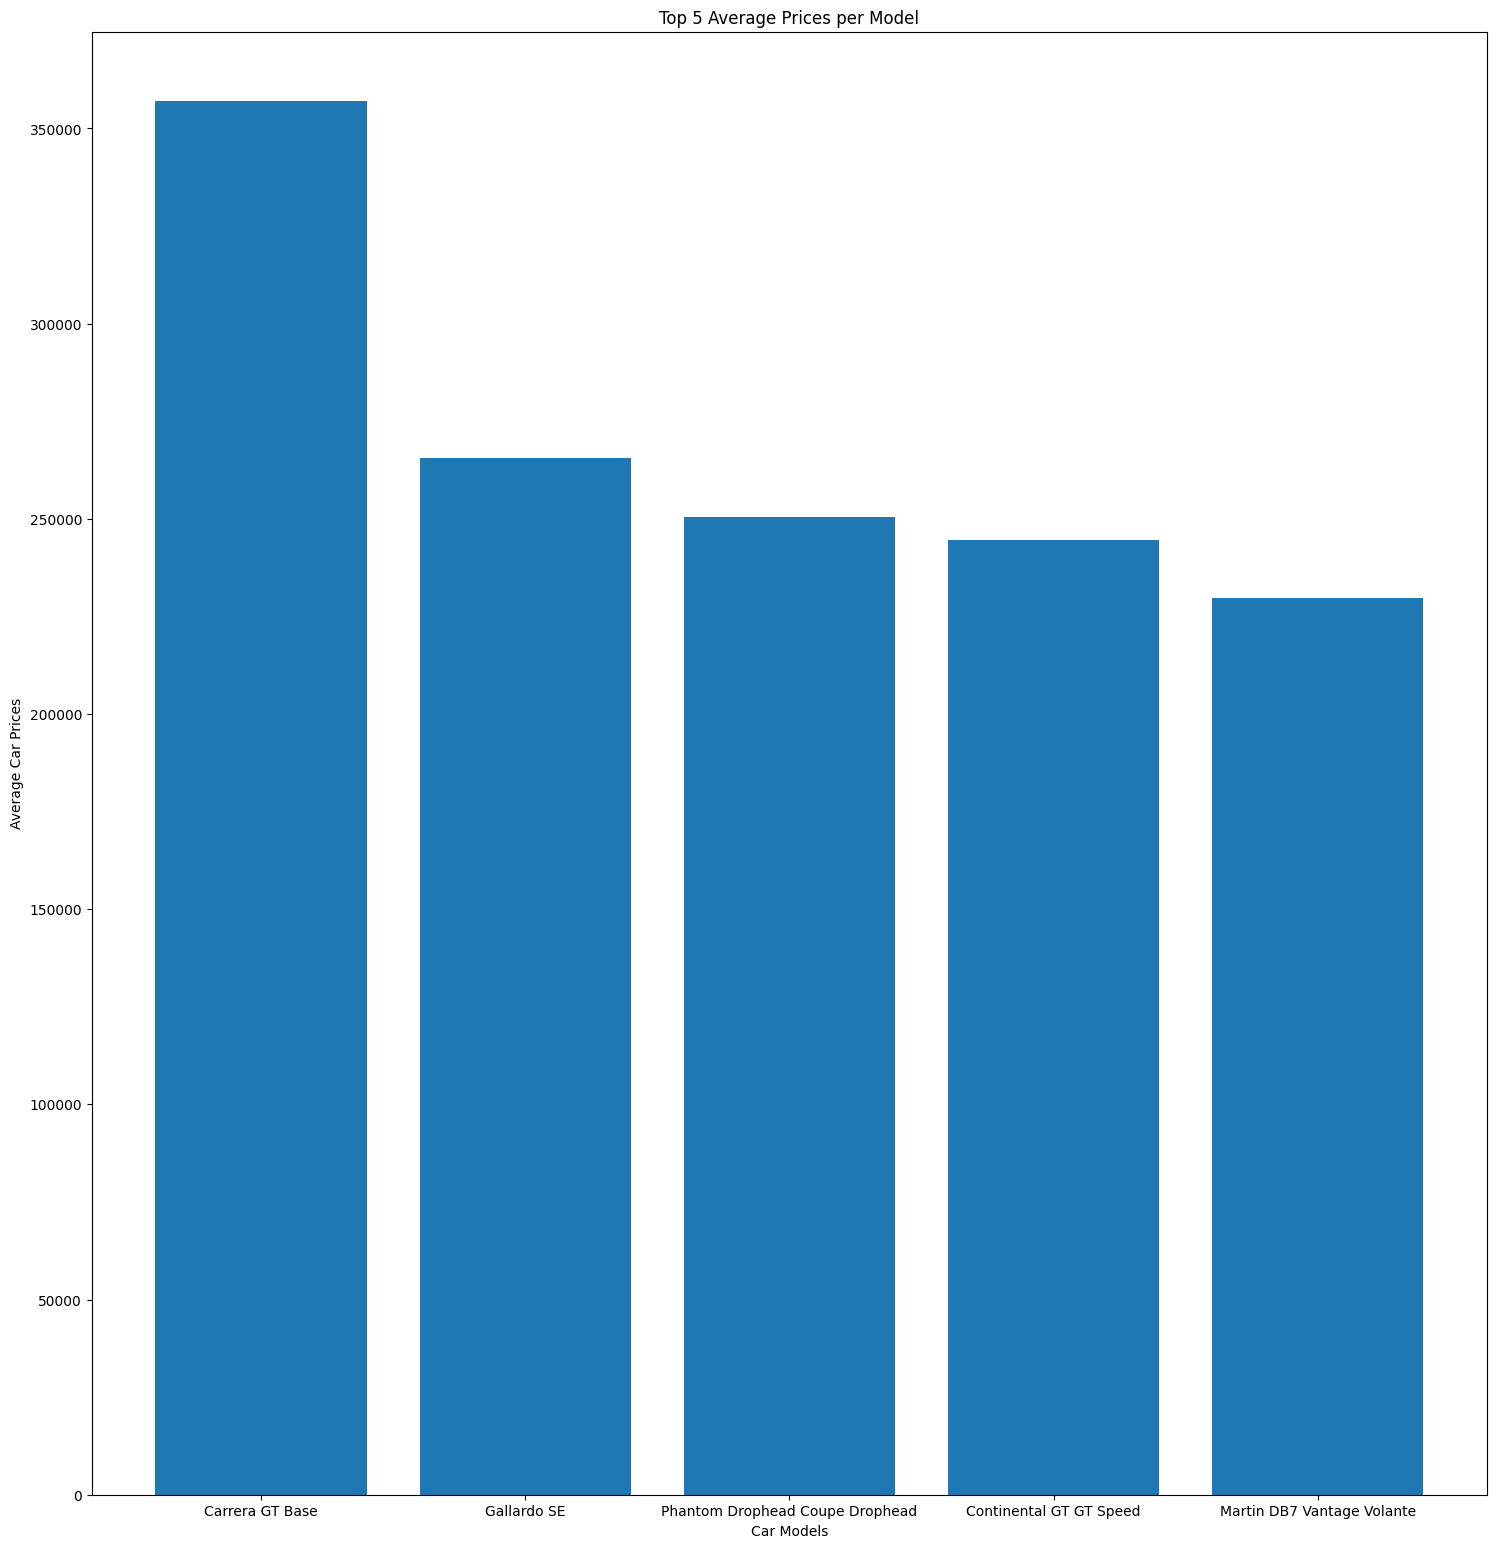

In [15]:
def plot_price_per_model():
    price_per_model = pd.DataFrame(car_df[["price", "model"]].groupby(by = "model").mean())
    price_per_model.reset_index(inplace=True)
    price_per_model = price_per_model.sort_values(by = "price", ascending=False).iloc[:5, ]
    fig, ax = plt.subplots()
    fig.set_size_inches(18, 19)
    ax.bar(x=price_per_model["model"], height=price_per_model["price"], align="center")
    ax.set_xlabel("Car Models")
    ax.set_ylabel("Average Car Prices")
    ax.set_title("Top 5 Average Prices per Model")
    plt.show()

plot_price_per_model()